In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
%%time
data = pd.read_csv('Dataset/train.csv', nrows=100000, parse_dates=['pickup_datetime'])

Wall time: 9.49 s


In [38]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  object             
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB


In [40]:
data.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [41]:
%%time
df = data.loc[data['pickup_latitude'].between(40,42)]
df = data.loc[data['pickup_longitude'].between(-75,-72)]
df = data.loc[data['dropoff_latitude'].between(40,42)]
df = data.loc[data['pickup_longitude'].between(-75,-72)]
df = data.loc[data['fare_amount'] > 2.5]
df = data.loc[data['passenger_count'] > 1]

Wall time: 43.2 ms


In [42]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000,30015.000000
mean,11.697004,-72.573972,39.944156,-72.570852,39.946027,3.257138
std,9.982925,10.245650,6.176424,10.252345,6.173029,1.427526
min,-5.000000,-75.414728,-74.007670,-75.354559,-74.006377,2.000000
25%,6.100000,-73.992227,40.734308,-73.991280,40.733908,2.000000
50%,8.500000,-73.982145,40.752492,-73.980478,40.753247,3.000000
75%,13.000000,-73.967797,40.766716,-73.963561,40.768140,5.000000
max,149.000000,40.787575,43.183332,40.797802,41.543217,6.000000


In [43]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

(0.0, 100.0)

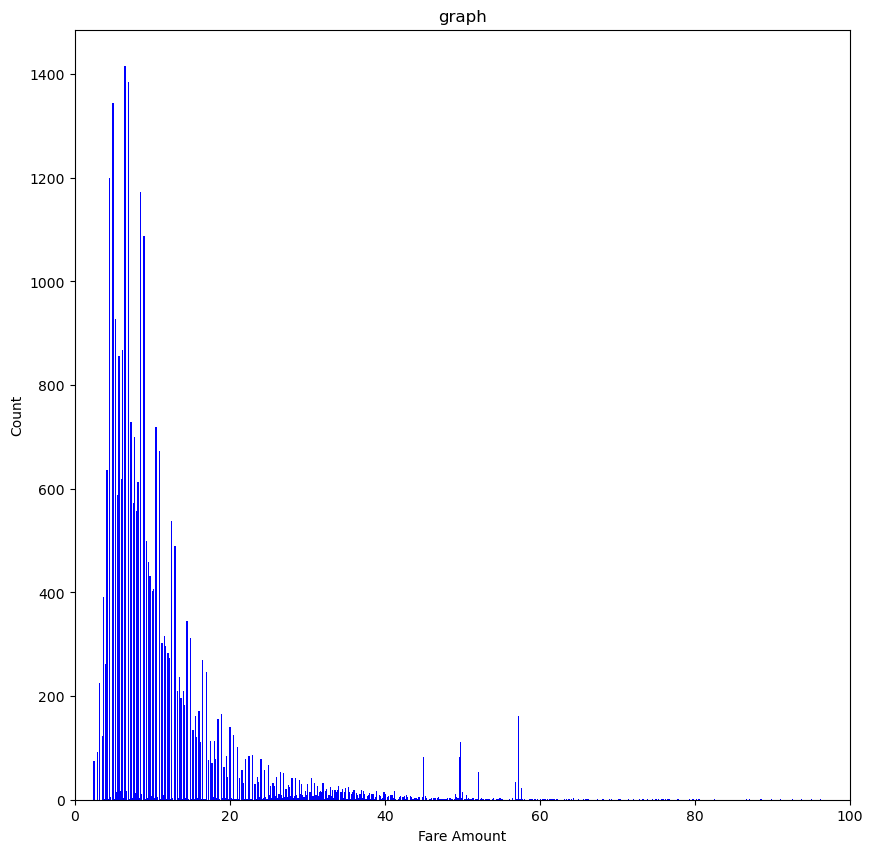

In [44]:
plt.figure(figsize=(10,10))
plt.hist(df['fare_amount'],1000,facecolor='blue')
plt.xlabel('Fare Amount')
plt.ylabel('Count')
plt.title('graph')
plt.xlim(0,100)

Text(0.5, 1.0, 'Graph of passenger count')

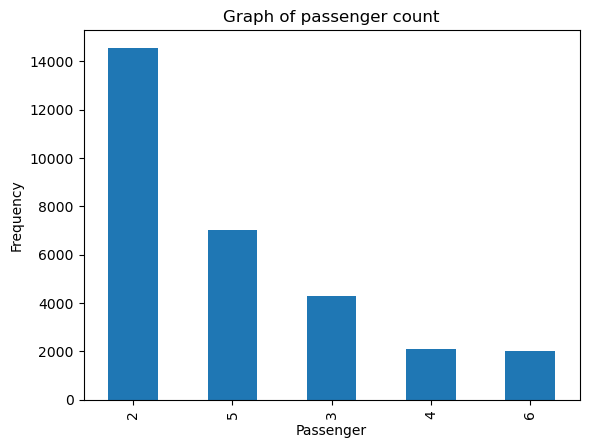

In [45]:
df['passenger_count'].value_counts().plot.bar()
plt.xlabel('Passenger')
plt.ylabel('Frequency')
plt.title('Graph of passenger count')

In [46]:
df = df.loc[df['passenger_count']<=10]

In [47]:
df['passenger_count'].value_counts()  

2    14561
5     7034
3     4289
4     2091
6     2040
Name: passenger_count, dtype: int64

In [48]:
import folium
nyc = folium.Map(location=[  40.7648, -73.9808  ],zoom_start=12,)
nyc

In [49]:
for i in df.index[:100]:
    folium.CircleMarker(location=(df['pickup_latitude'][i],df['pickup_longitude'][i]), color='red').add_to(nyc)
 

In [50]:
for i in df.index[:100]:
    folium.CircleMarker(location=(df['dropoff_latitude'][i],df['dropoff_longitude'][i]), color='green').add_to(nyc)
nyc

In [51]:
df['year'] = data['pickup_datetime'].dt.year 
df['month'] = data['pickup_datetime'].dt.month 
df['day'] = data['pickup_datetime'].dt.day 
df['weekday'] = data['pickup_datetime'].dt.weekday
df['hour'] = data['pickup_datetime'].dt.hour 

In [52]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,1
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,2012,12,24,0,11
12,2009-11-06 01:04:03.0000002,4.1,2009-11-06 01:04:03+00:00,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,4,1
14,2011-04-05 17:11:05.0000001,7.7,2011-04-05 17:11:05+00:00,-74.001821,40.737547,-73.998060,40.722788,2,2011,4,5,1,17


In [53]:
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    km = 6367 * c
    return km

In [54]:
lon1 = df['pickup_longitude']
lat1 = df['pickup_latitude']
lon2 = df['dropoff_longitude']
lat2 = df['dropoff_latitude']

In [55]:
df['distance'] = haversine(lon1, lat1, lon2, lat2)

In [56]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.388653
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00+00:00,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,1,2.847838
11,2012-12-24 11:24:00.00000098,5.5,2012-12-24 11:24:00+00:00,0.000000,0.000000,0.000000,0.000000,3,2012,12,24,0,11,0.000000
12,2009-11-06 01:04:03.0000002,4.1,2009-11-06 01:04:03+00:00,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,4,1,0.717317
14,2011-04-05 17:11:05.0000001,7.7,2011-04-05 17:11:05+00:00,-74.001821,40.737547,-73.998060,40.722788,2,2011,4,5,1,17,1.670395


In [57]:
df = df.loc[df['distance'] > 0]

In [58]:
df = df.drop(['key','pickup_datetime'],axis=1)

In [59]:
import sklearn
from sklearn.model_selection import train_test_split

In [60]:
y = df['fare_amount']
x = df.drop(['fare_amount'],axis=1)
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,weekday,hour,distance
2,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,1.388653
9,-73.980658,40.733873,-73.991540,40.758138,2,2009,9,2,2,1,2.847838
12,-73.991601,40.744712,-73.983081,40.744682,2,2009,11,6,4,1,0.717317
14,-74.001821,40.737547,-73.998060,40.722788,2,2011,4,5,1,17,1.670395
25,-73.991875,40.754437,-73.977230,40.774323,3,2011,6,21,1,16,2.530357
...,...,...,...,...,...,...,...,...,...,...,...
99988,-73.990850,40.751173,-73.955861,40.776090,3,2011,3,5,5,10,4.042206
99990,-73.991776,40.726911,-73.961307,40.777582,2,2014,9,7,6,3,6.187488
99993,-73.989213,40.741312,-73.954110,40.784308,2,2010,11,24,2,21,5.617658
99995,-73.947977,40.784792,-73.964262,40.792347,5,2013,9,24,1,7,1.606908


In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [63]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rms = np.sqrt(mse)
rms.round(3),mse.round(3)

(9.495, 90.152)

In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
%%time
model_rf = RandomForestRegressor()
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
rms = np.sqrt(mse)
rms.round(3),mse.round(3)

Wall time: 13.6 s


(3.831, 14.68)

In [66]:
coordinates = folium.Map(location=[ 40.7648, -73.9808 ],title='OpemStreetMap')

popup = folium.LatLngPopup()
popup = folium.ClickForMarker()

coordinates.add_child(popup)
coordinates

In [67]:
print('Enter your details below')

pickup_coordinates=str(input('Enter pickup coordinates: '))
dropoff_coordinates=str(input('Enter dropoff coordinates: '))

pickup_latitude = float(pickup_coordinates.split(',')[0])
pickup_longitude = float(pickup_coordinates.split(',')[1])
dropoff_latitude = float(dropoff_coordinates.split(',')[0])
dropoff_longitude = float(dropoff_coordinates.split(',')[1])

passenger = int(input("Input number of passenger"))

date = input('Enter date (DD/MM/Year): ')

year = int(date.split('/')[2])
month = int(date.split('/')[1])
day = int(date.split('/')[0])

week_day = int(input("Input pickup week: "))
hour = int(input("Input hour: "))

distance = haversine(pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude)

print('Distance is: ',distance)

arr = np.array([pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude,
               passenger,year,month,day,week_day,hour,distance])

print('Fare amount is ($):', model_rf.predict(arr.reshape(1,-1)))

Enter your details below
Enter pickup coordinates: 42.543,-72.345
Enter dropoff coordinates: 40.543,-73655
Input number of passenger2
Enter date (DD/MM/Year): 10/11/2013
Input pickup week: 1
Input hour: 3
Distance is:  15850.96485279855
Fare amount is ($): [29.0666]


C:\Users\satya\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [68]:
import joblib
from joblib import Parallel,delayed
joblib.dump(model_rf,'model.pkl')

['model.pkl']